In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Matplotlib

Matplotlib (https://matplotlib.org/) is a widely used data visualization library in Python that provides comprehensive tools for creating static, animated, and interactive visualizations. It is highly customizable and allows users to generate a variety of plots, including line graphs, scatter plots, bar charts, and histograms. Matplotlib serves as the foundation for many other visualization libraries.


# Seaborn 

Seaborn (https://seaborn.pydata.org/) is a statistical data visualization library built on top of Matplotlib. It simplifies the creation of visually appealing and informative statistical graphics by providing high-level functions for drawing complex relationships among data. Seaborn integrates well with pandas DataFrames and is commonly used for exploratory data analysis.


# Plotly

Plotly (https://plotly.com/) is an interactive visualization library that enables the creation of dynamic and web-based visualizations. It supports a variety of chart types, including scatter plots, line charts, bar charts, and 3D plots. Plotly is particularly useful for dashboards and applications requiring interactive elements such as zooming, hovering, and filtering.


# Statsmodels

Statsmodels (https://www.statsmodels.org/stable/index.html) is a statistical modeling library in Python that provides tools for estimating and interpreting different types of statistical models. It includes functions for regression analysis, time series forecasting, hypothesis testing, and statistical tests. Statsmodels is often used in econometrics and research for conducting in-depth statistical analyses.

In [3]:
# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv('titanic.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


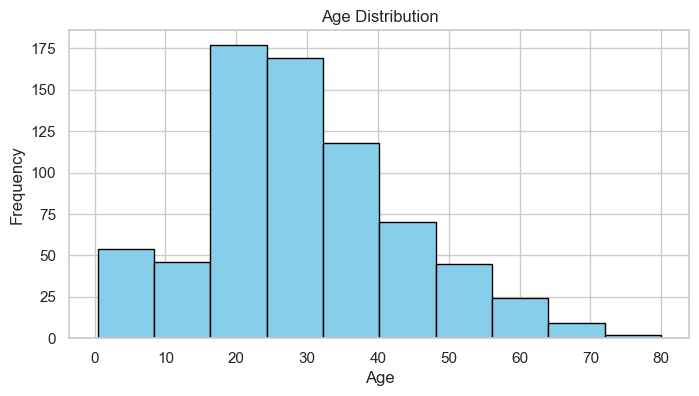

In [6]:
# %% [code]
# Histogram for Income Distribution
plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

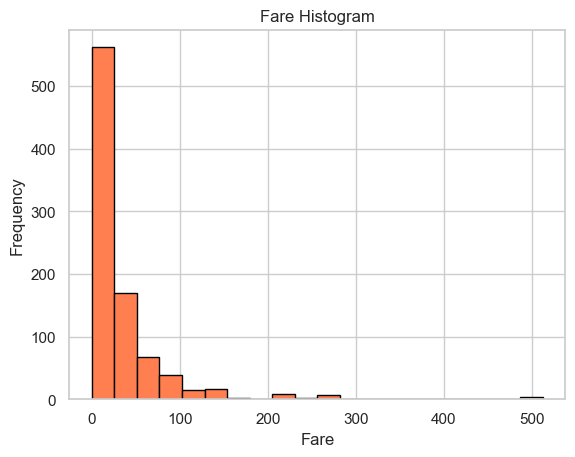

In [7]:
# %% [code]
# Pandas built-in histogram for Income
df['Fare'].plot(kind='hist', bins=20, color='coral', edgecolor='black', title='Fare Histogram')
plt.xlabel("Fare")
plt.show()

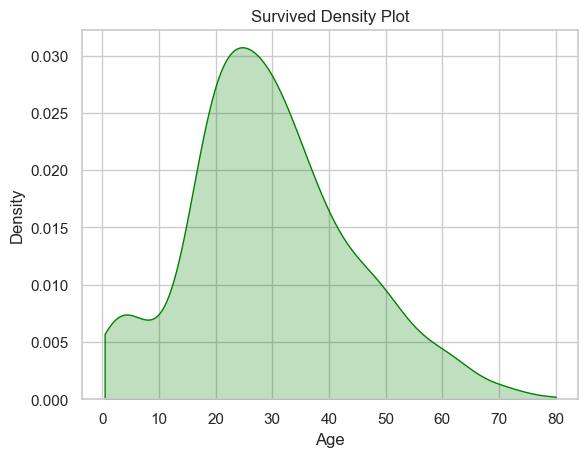

In [12]:
# %% [code]
# KDE Plot for BMI Distribution using Seaborn
x = "Age"
sns.kdeplot(data=df, x=x, fill=True, color='green', clip=(min(df[x]), max(df[x])))
plt.title("Survived Density Plot")
plt.show()

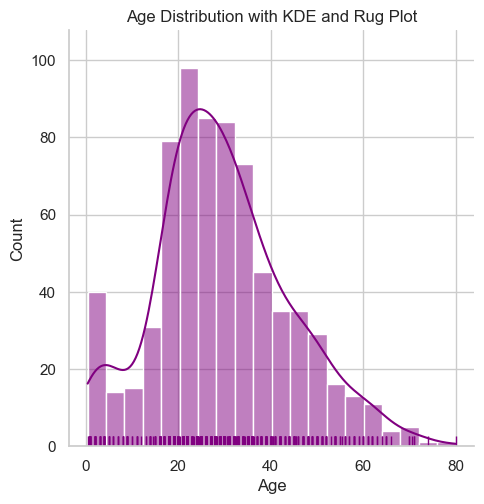

In [8]:
# Density and Rug Plot for BMI using Seaborn's displot
sns.displot(df['Age'], kde=True, rug=True, color='purple')
plt.title("Age Distribution with KDE and Rug Plot")
plt.show()

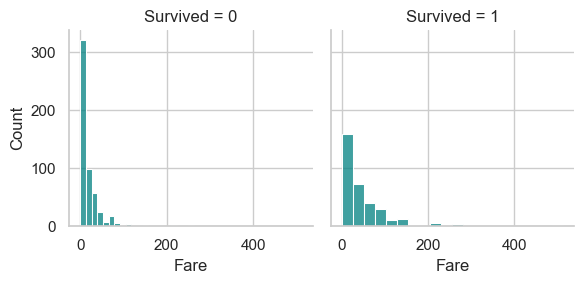

In [14]:
# %% [code]
# FacetGrid: Histogram of BMI separated by Gender
g = sns.FacetGrid(df, col="Survived")
g.map(sns.histplot, "Fare",bins=20, color="teal")
plt.show()

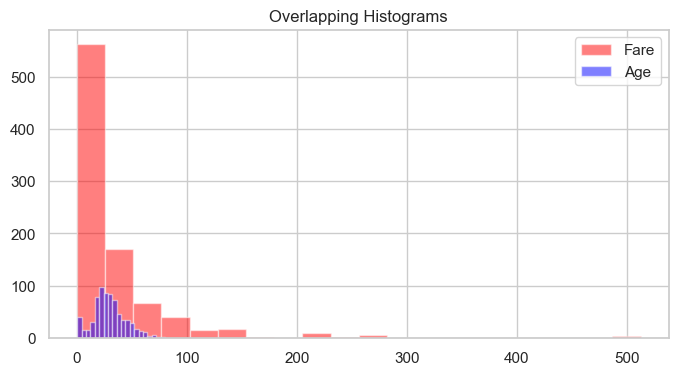

In [10]:
# Adjusting transparency (alpha) and adding labels
plt.figure(figsize=(8, 4))
plt.hist(df['Fare'], bins=20, color='red', alpha=0.5, label='Fare')
plt.hist(df['Age'], bins=20, color='blue', alpha=0.5, label='Age')
plt.title("Overlapping Histograms")
plt.legend()
plt.show()


In [11]:
df.select_dtypes(include = ['int64', 'float64']).corr()['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

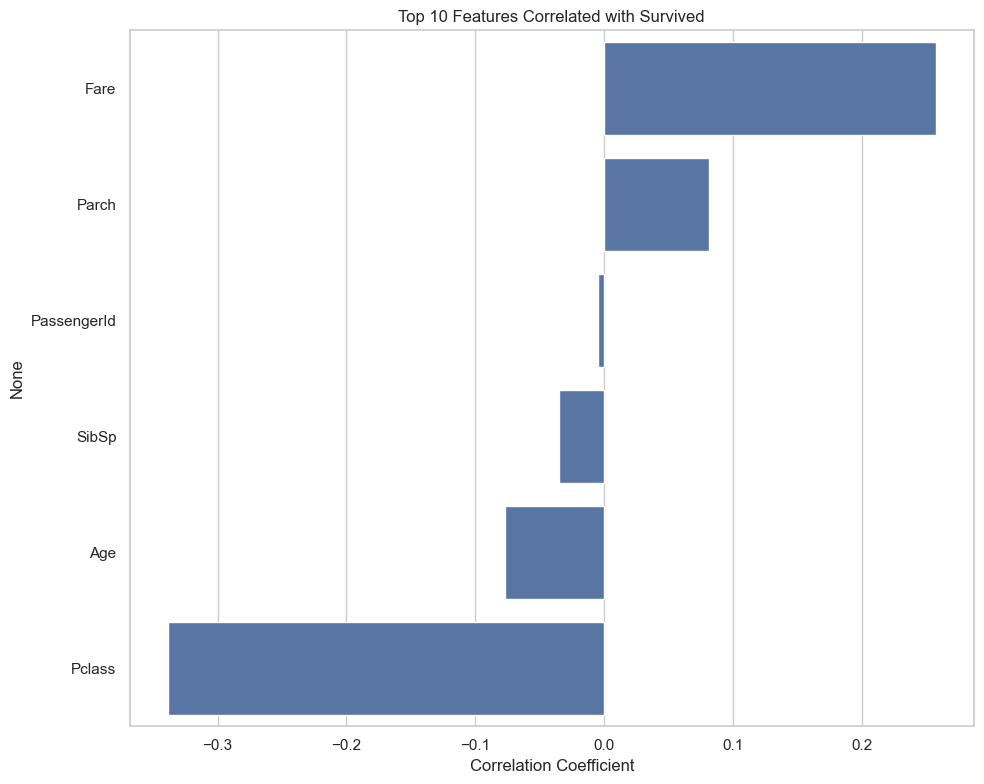

Survived          1.000 (Strong)
Fare            0.257 (Moderate)
Parch           0.082 (Moderate)
PassengerId        -0.005 (Weak)
SibSp          -0.035 (Moderate)
Age            -0.077 (Moderate)
Pclass         -0.338 (Moderate)
Name: Survived, dtype: object

In [12]:
numeric_db = df.select_dtypes(include = ['int64', 'float64'])

correlation = numeric_db.corr()['Survived'].sort_values(ascending = False)


plt.figure(figsize = (10,8))
top_features = correlation[1:]
sns.barplot(x = top_features.values, y = top_features.index)
plt.title('Top 10 Features Correlated with Survived')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

correlation.apply(lambda x: f"{x:.3f} ({'Strong' if abs(x) > 0.5 else 'Moderate' if abs(x) > 0.03 else 'Weak'})").head(10)

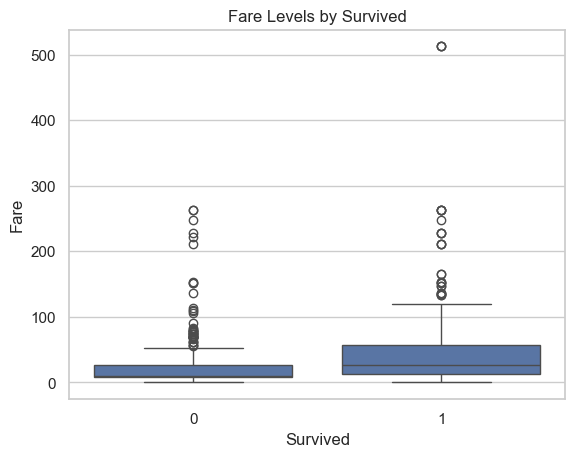

In [13]:
# %% [code]
# Box Plot: Fare levels by Age

x = "Survived"
y = "Fare"
sns.boxplot(x=x, y=y, data=df)
plt.title(f"{y} Levels by {x}")
plt.show()

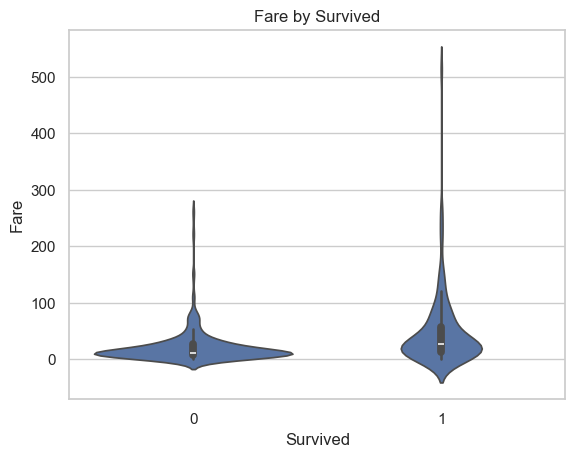

In [14]:
# %% [code]
# Violin Plot: Glucose Level by Smoking Status

x = "Survived"
y = "Fare"

sns.violinplot(x=x, y=y, data=df)
plt.title(f"{y} by {x}")
plt.show()

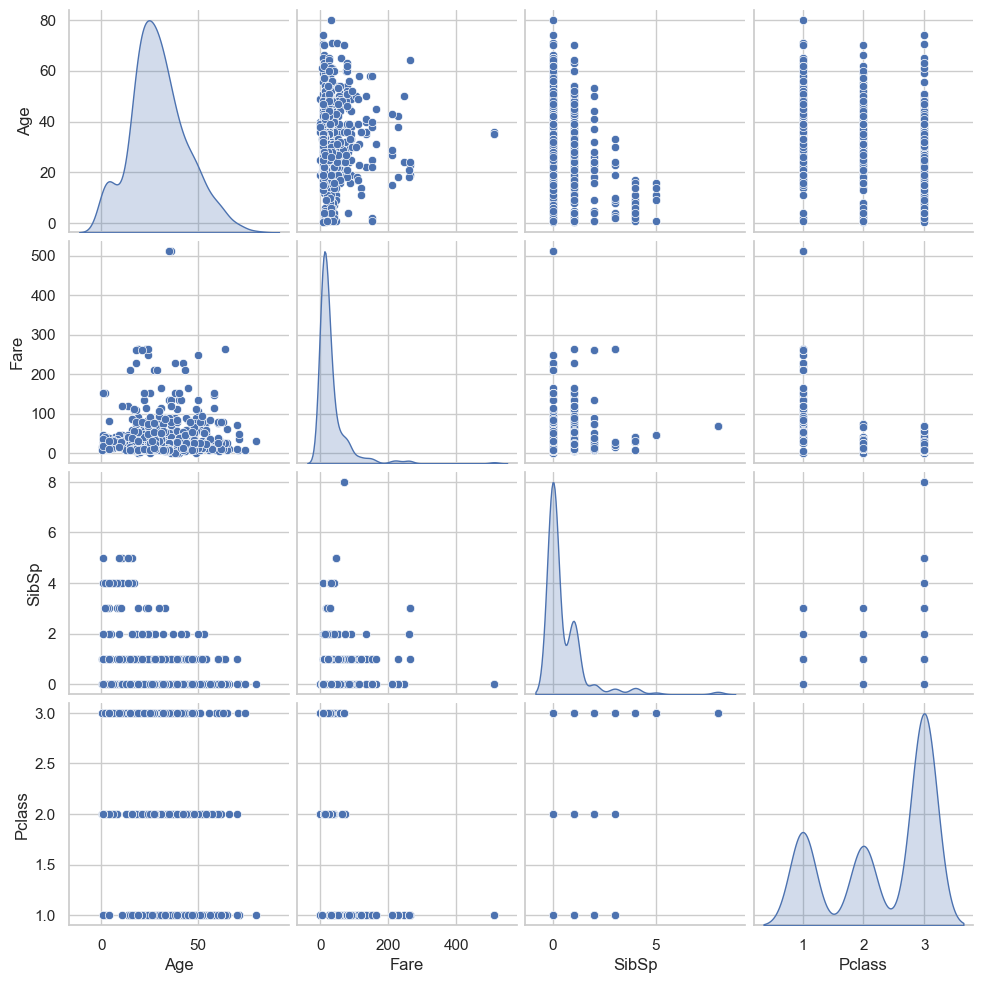

In [15]:
# %% [code]
# Pair Plot for a subset of numerical variables
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Pclass']], diag_kind='kde')
plt.show()

C:\Users\fmonc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\fmonc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\fmonc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\fmonc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

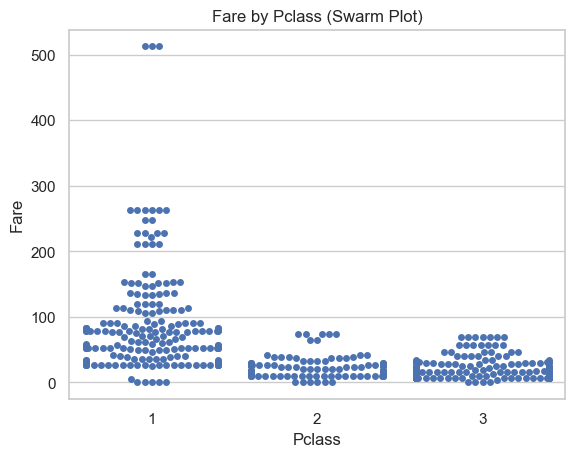

In [16]:
# %% [code]
# Swarm Plot: BMI by Gender

x = "Pclass"
y = "Fare"
sns.swarmplot(x=x, y=y, data=df)
plt.title(f"{y} by {x} (Swarm Plot)")
plt.show()

C:\Users\fmonc\AppData\Local\Temp\ipykernel_9108\1161511241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=df, palette='pastel')


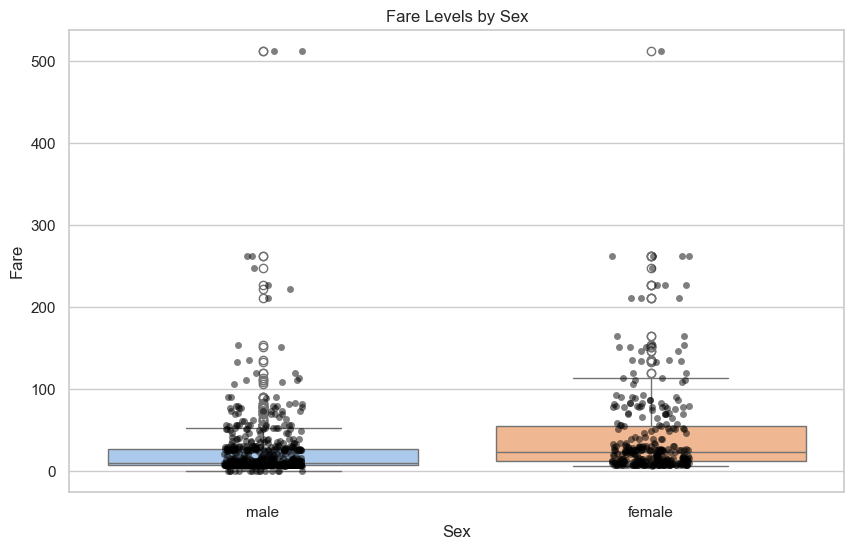

In [17]:
# %% [code]
# Combine a Box Plot and Strip Plot 
plt.figure(figsize=(10, 6))
x = "Sex"
y = "Fare"
sns.boxplot(x=x, y=y, data=df, palette='pastel')
sns.stripplot(x=x, y=y, data=df, color='black', alpha=0.5)
plt.title(f"{y} Levels by {x}")
plt.show()

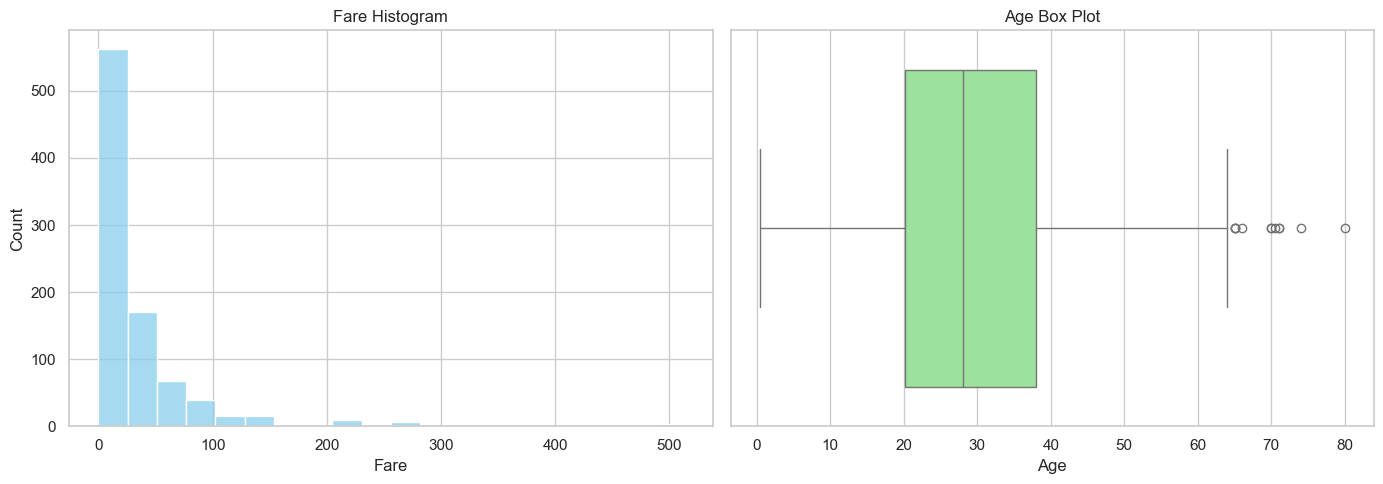

In [22]:
# Subplots: Income Histogram and Income Box Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Fare'], bins=20, ax=axes[0], color='skyblue')
axes[0].set_title("Fare Histogram")
sns.boxplot(x=df['Age'], ax=axes[1], color='lightgreen')
axes[1].set_title("Age Box Plot")
plt.tight_layout()
plt.show()

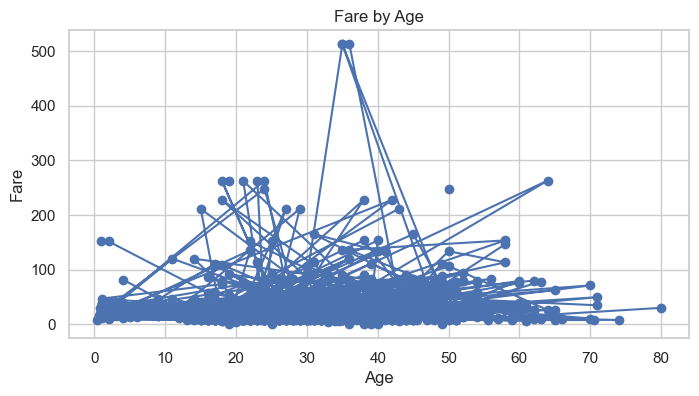

In [23]:
# %% [code]
df["Age_in_5_years"] = df["Age"]+5
# Line Plot: Fare vs. Age
plt.figure(figsize=(8, 4))
plt.plot(df['Age'], df['Fare'], marker='o', linestyle='-', color='b')
plt.title("Fare by Age")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


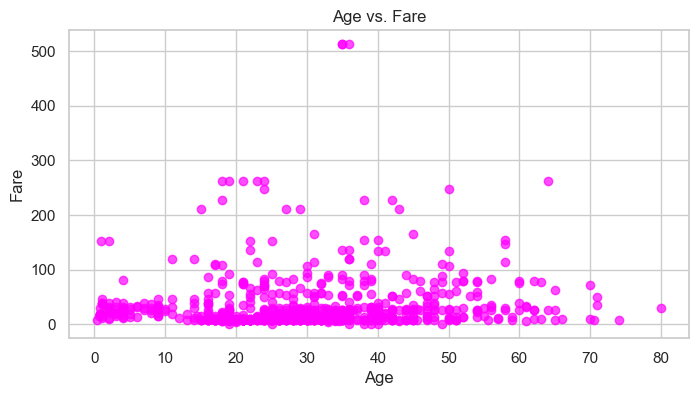

In [24]:
# Scatter Plot: Glucose Level vs. BMI
plt.figure(figsize=(8, 4))
plt.scatter(df['Age'], df['Fare'], color='magenta', alpha=0.7)
plt.title("Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

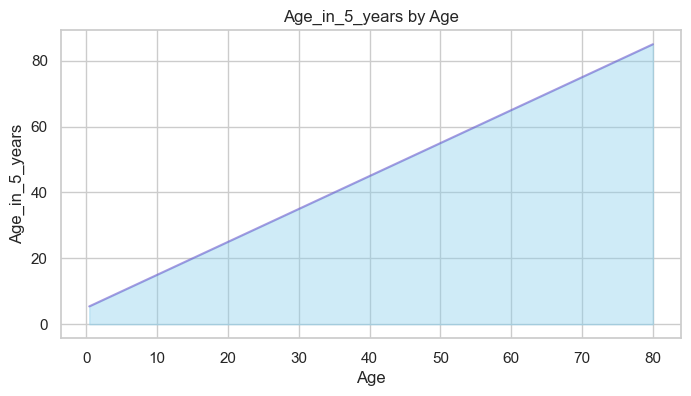

In [25]:
# %% [code]
# Area Plot: Daily Caloric Intake by Age (sorted by Age)
df["Age_in_5_years"] = df["Age"]+5

df_sorted = df.sort_values(by='Age')
plt.figure(figsize=(8, 4))
plt.fill_between(df_sorted['Age'], df_sorted['Age_in_5_years'], color="skyblue", alpha=0.4)
plt.plot(df_sorted['Age'], df_sorted['Age_in_5_years'], color="Slateblue", alpha=0.6)
plt.title("Age_in_5_years by Age")
plt.xlabel("Age")
plt.ylabel("Age_in_5_years")
plt.show()


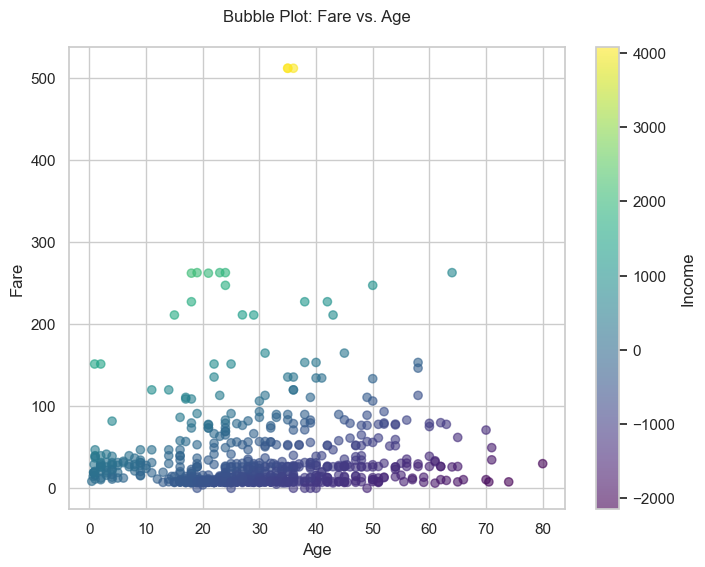

In [26]:
# %% [code]

df["Income"] = 10*df["Fare"] - 30*df["Age"] + np.random.normal(loc=0, scale=2, size=df.shape[0])
# Bubble Plot: BMI vs. Glucose Level (Bubble size represents Daily Caloric Intake, color indicates Age)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], 
            #s=df['Age'] / 10,  # Adjust marker sizes as needed
            c=df['Income'], cmap='viridis', alpha=0.6)
plt.title("Bubble Plot: Fare vs. Age\n")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.colorbar(label='Income')
plt.show()


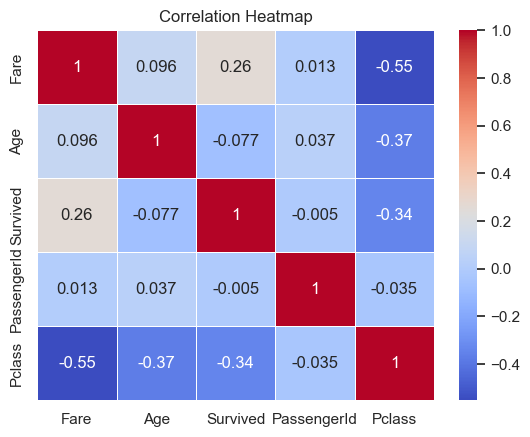

In [27]:
# Correlation Heatmap for selected numeric columns
cols = ['Fare', 'Age', 'Survived', 'PassengerId', "Pclass"]
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

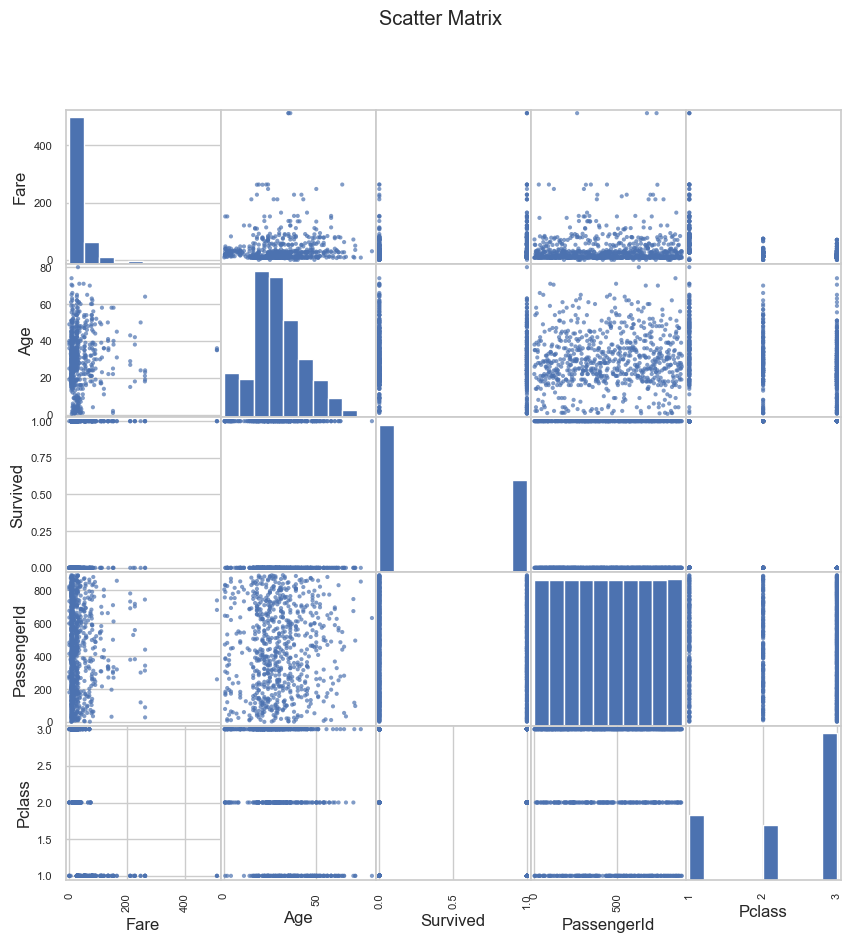

In [28]:
# Scatter Matrix (Pair Plot) for a subset of numeric columns
pd.plotting.scatter_matrix(df[['Fare', 'Age', 'Survived', 'PassengerId', "Pclass"]], figsize=(10, 10), alpha=0.7)
plt.suptitle("Scatter Matrix")
plt.show()

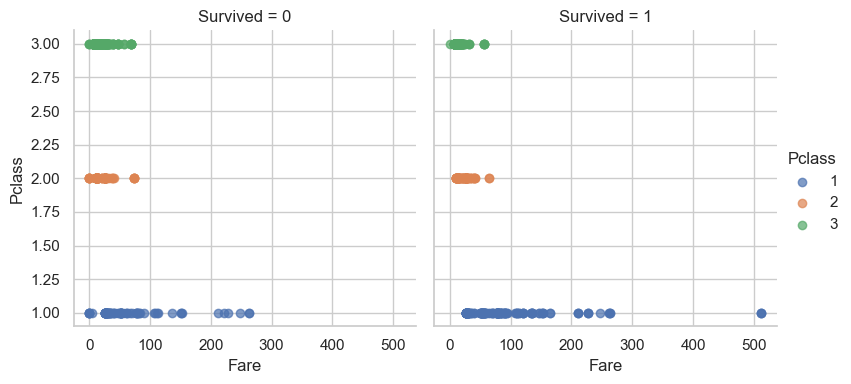

In [29]:
# Facet Grid: Scatter plot of BMI vs. Cholesterol separated by Gender and colored by Smoking Status
g = sns.FacetGrid(df, col="Survived", hue="Pclass", height=4)
g.map(plt.scatter, "Fare", "Pclass", alpha=0.7)
g.add_legend()
plt.show()

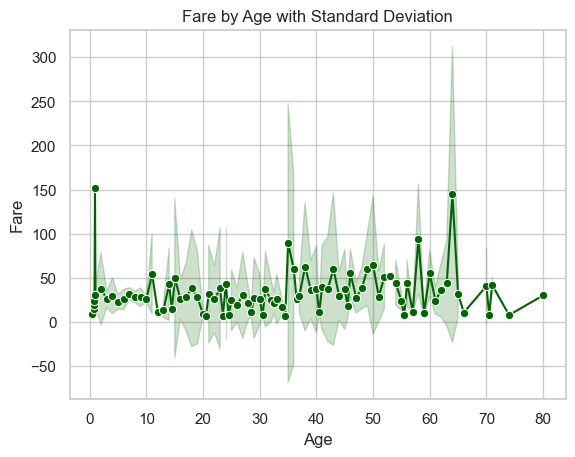

In [30]:
# Line Plot with Error Bars: Fare by Age (with confidence interval using Seaborn)
sns.lineplot(x='Age', y='Fare', data=df, errorbar='sd', marker='o', color='darkgreen')
plt.title("Fare by Age with Standard Deviation")
plt.show()

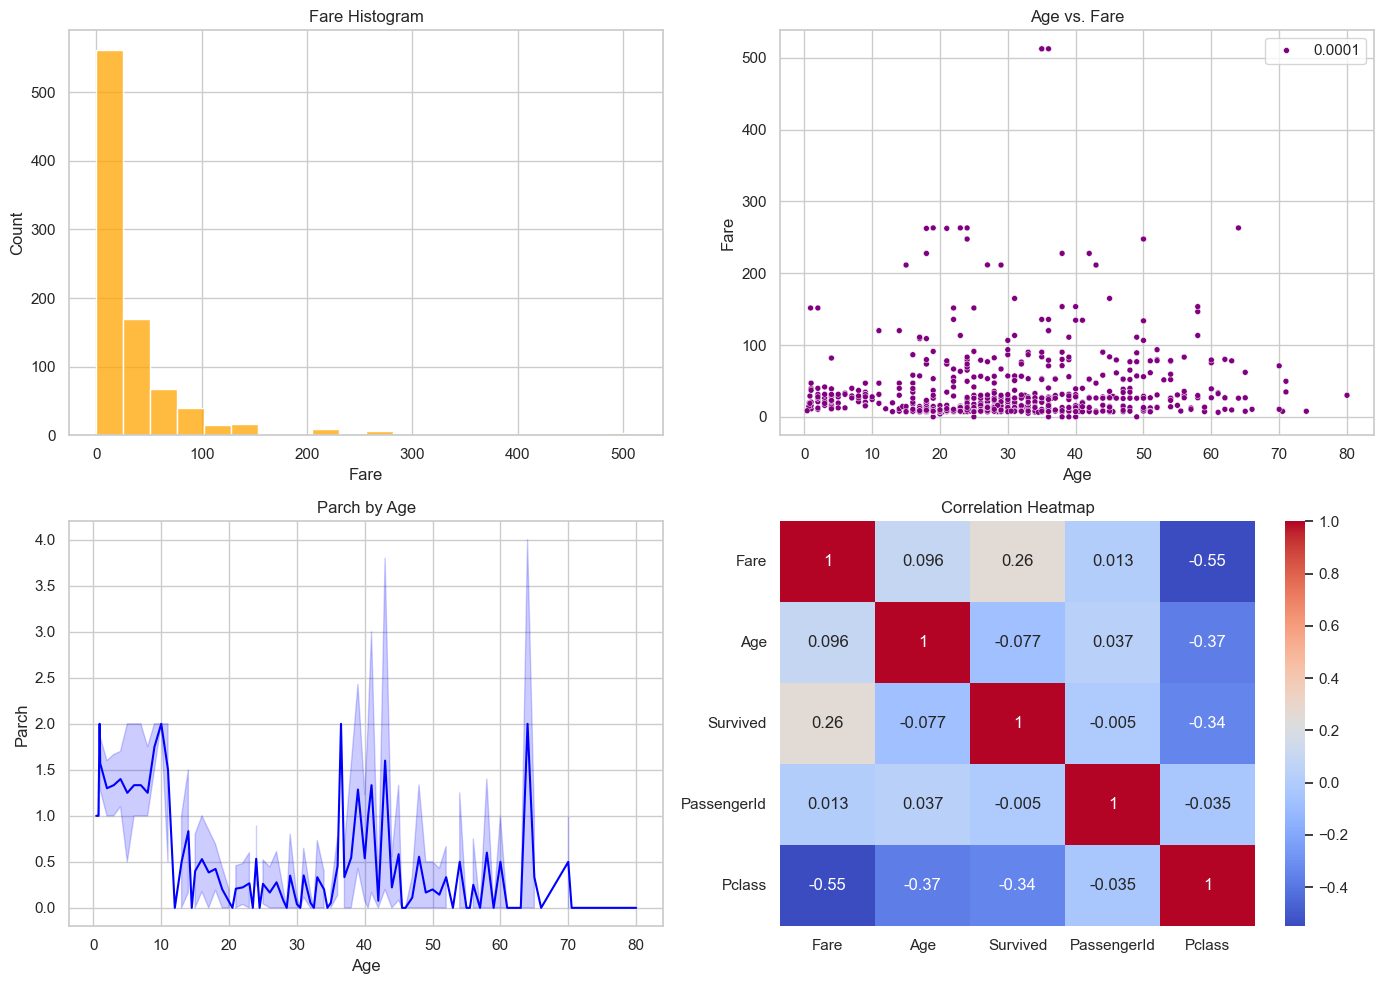

In [31]:
# Subplots: Combining different visualizations in one figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['Fare'], bins=20, ax=axes[0, 0], color='orange')
axes[0, 0].set_title("Fare Histogram")
sns.scatterplot(x='Age', y='Fare', data=df, ax=axes[0, 1], color='purple', size=0.0001)
axes[0, 1].set_title("Age vs. Fare")
sns.lineplot(x='Age', y='Parch', data=df, ax=axes[1, 0], color='blue')
axes[1, 0].set_title("Parch by Age")
sns.heatmap(corr, ax=axes[1, 1], annot=True, cmap='coolwarm')
axes[1, 1].set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()

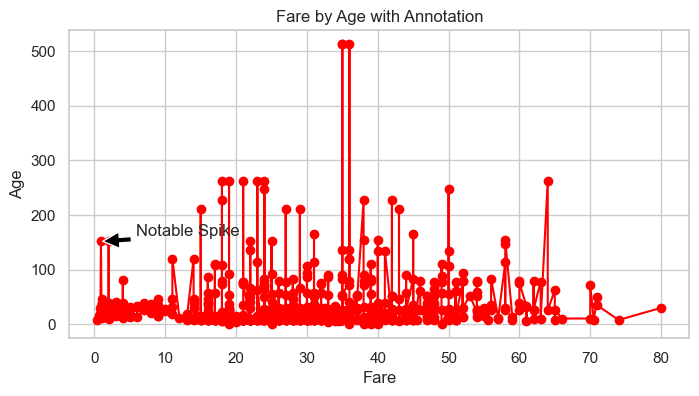

In [32]:
# Annotation Example: Fare by Age with a notable spike annotated
plt.figure(figsize=(8, 4))
df_sort = df.sort_values("Age")
plt.plot(df_sort['Age'], df_sort['Fare'], marker='o', color='red')
plt.title("Fare by Age with Annotation")
plt.xlabel("Fare")
plt.ylabel("Age")
# For the purpose of this demo, annotate the first occurrence where Fare is above a threshold
spike = df_sort[df_sort['Fare'] > df_sort['Fare'].quantile(0.9)].iloc[0]
plt.annotate('Notable Spike', xy=(spike['Age'], spike['Fare']),
             xytext=(spike['Age']+5, spike['Fare']+10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# Break1:

1)Given the dataframe attached "df1.csv", what is the distribution of "y"?

2)Given the dataframe attached "df2.csv", which columns contributed to creating the column "f"?

In [15]:
np.linspace(-10, 10, 100)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [34]:
x = np.linspace(-10, 10, 100)
np.sin(x) * np.exp(-0.1 * x**2)

array([ 2.46985202e-05,  2.46928038e-05,  1.70704308e-05, -4.53467363e-06,
       -4.94022501e-05, -1.30226284e-04, -2.63259464e-04, -4.67778039e-04,
       -7.64449298e-04, -1.17211625e-03, -1.70250697e-03, -2.35247093e-03,
       -3.09358553e-03, -3.85940015e-03, -4.53121004e-03, -4.92406113e-03,
       -4.77561221e-03, -3.74139414e-03, -1.40071563e-03,  2.72227366e-03,
        9.11830442e-03,  1.82308449e-02,  3.03719635e-02,  4.56196879e-02,
        6.37048425e-02,  8.39002197e-02,  1.04929427e-01,  1.24915914e-01,
        1.41393477e-01,  1.51397038e-01,  1.51646138e-01,  1.38823271e-01,
        1.09935651e-01,  6.27336371e-02, -3.85597535e-03, -8.93356106e-02,
       -1.91341752e-01, -3.05507647e-01, -4.25531775e-01, -5.43479965e-01,
       -6.50321438e-01, -7.36667072e-01, -7.93646300e-01, -8.13832289e-01,
       -7.92108288e-01, -7.26364946e-01, -6.17930836e-01, -4.71665822e-01,
       -2.95686092e-01, -1.00735587e-01,  1.00735587e-01,  2.95686092e-01,
        4.71665822e-01,  

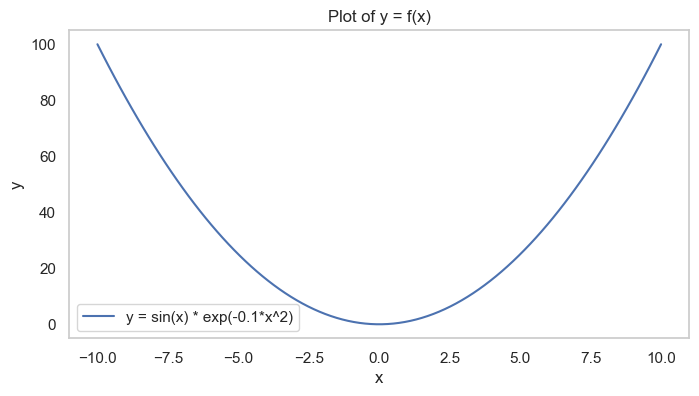

In [35]:
# Generate x values
x = np.linspace(-10, 10, 100)
# Define a function y = f(x)
#y = np.sin(x) * np.exp(-0.1 * x**2)
y = x**2
# Plot y = f(x)
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='y = sin(x) * exp(-0.1*x^2)', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = f(x)')
plt.legend()
plt.grid()
plt.show()



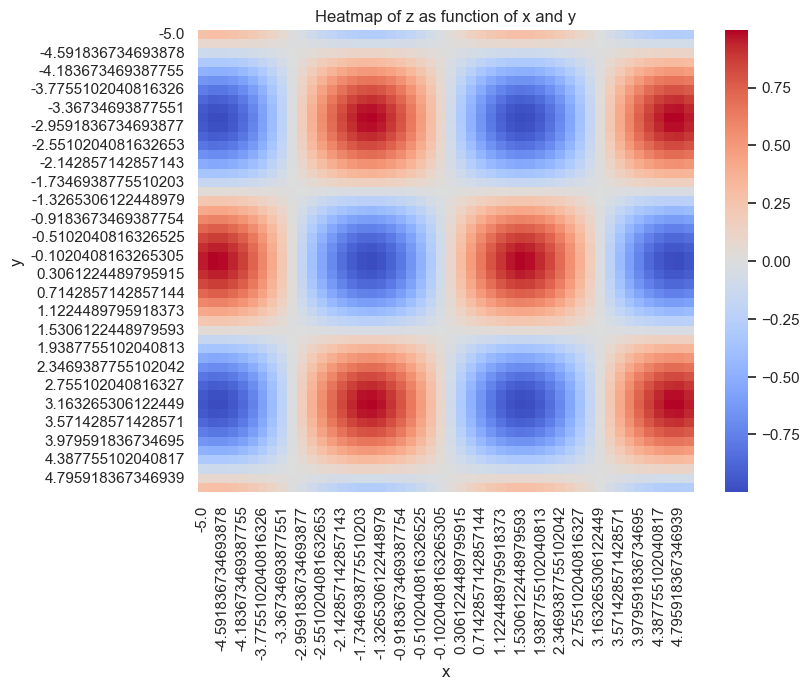

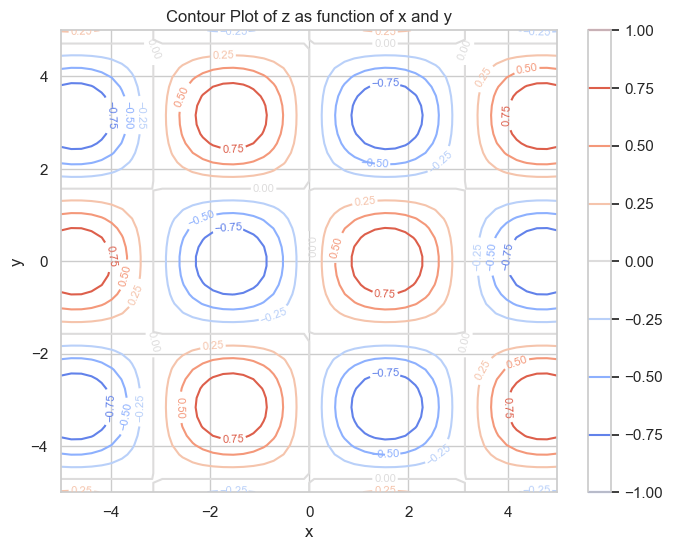

In [36]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.sin(X) * np.cos(Y)  # Example function

# Convert to DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [37]:
years = 100
periods = years*12
date_range = pd.date_range(start='2020-01-01', periods=periods, freq='M')

# Create a synthetic time series with trend and seasonality
trend = np.linspace(10, 50, periods)  # Linear trend
#trend[45] = trend[45]-20
seasonality = np.tile(1+0.5* np.sin(np.linspace(0, 2 * np.pi, 12)), years)  # Seasonal component
noise = np.random.normal(scale=3, size=periods)  # Random noise
time_series = trend * seasonality + noise

# Create a DataFrame
ts_df = pd.DataFrame({'Date': date_range, 'Value': time_series,
                      "seasonality": seasonality, "trend": trend, "noise": noise})
ts_df.set_index('Date', inplace=True)



C:\Users\fmonc\AppData\Local\Temp\ipykernel_9108\3457121509.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2020-01-01', periods=periods, freq='M')


In [38]:
np.tile(10 * np.sin(np.linspace(0, 2 * np.pi, 12)), years)

array([ 0.00000000e+00,  5.40640817e+00,  9.09631995e+00, ...,
       -9.09631995e+00, -5.40640817e+00, -2.44929360e-15], shape=(1200,))

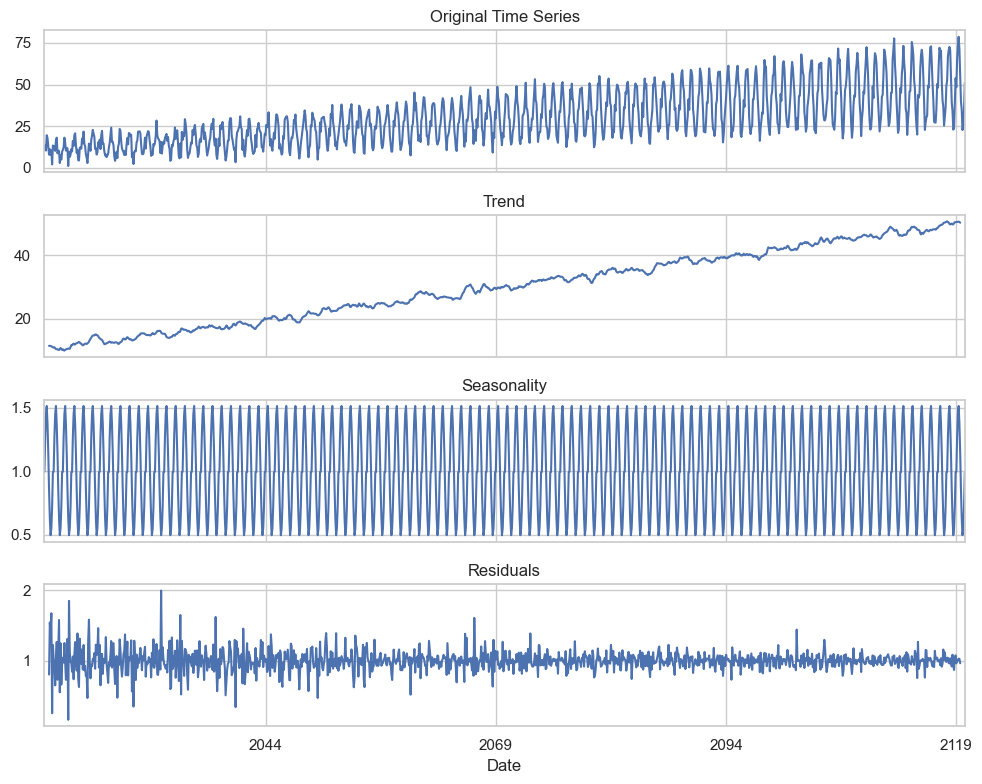

In [39]:
# Apply seasonal decomposition
result = seasonal_decompose(ts_df['Value'], model='multiplicative', period=12)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
ts_df['Value'].plot(ax=axes[0], title='Original Time Series')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonality')
result.resid.plot(ax=axes[3], title='Residuals')
plt.tight_layout()
plt.show()

# ST = T + S + R
# ST = T*S+R

In [40]:
ts_df

,Value,seasonality,trend,noise
Date,,,,
2020-01-31,10.598984,1.000000,10.000000,0.598984
2020-02-29,13.415083,1.270320,10.033361,0.669500
2020-03-31,10.367950,1.454816,10.066722,-4.277279
2020-04-30,19.576140,1.494911,10.100083,4.477417
2020-05-31,17.862911,1.377875,10.133445,3.900293
...,...,...,...,...
2119-08-31,34.887762,0.622125,49.866555,3.864520
2119-09-30,22.721594,0.505089,49.899917,-2.482319
2119-10-31,25.392152,0.545184,49.933278,-1.830672


<Axes: xlabel='Date'>

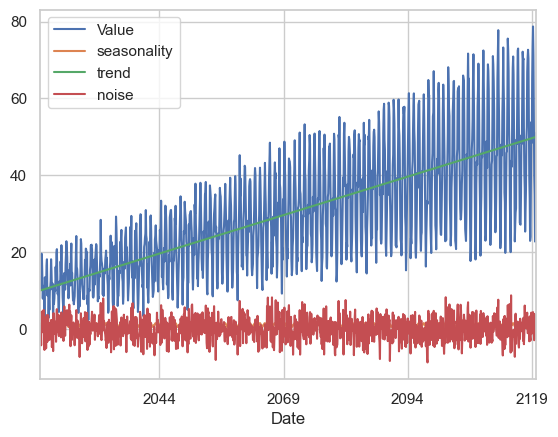

In [41]:
ts_df.plot()



# Break2:

1)Plot the function y = log(x), how can you improve its plot in critical areas?

2)Recreate the following heatmaps:

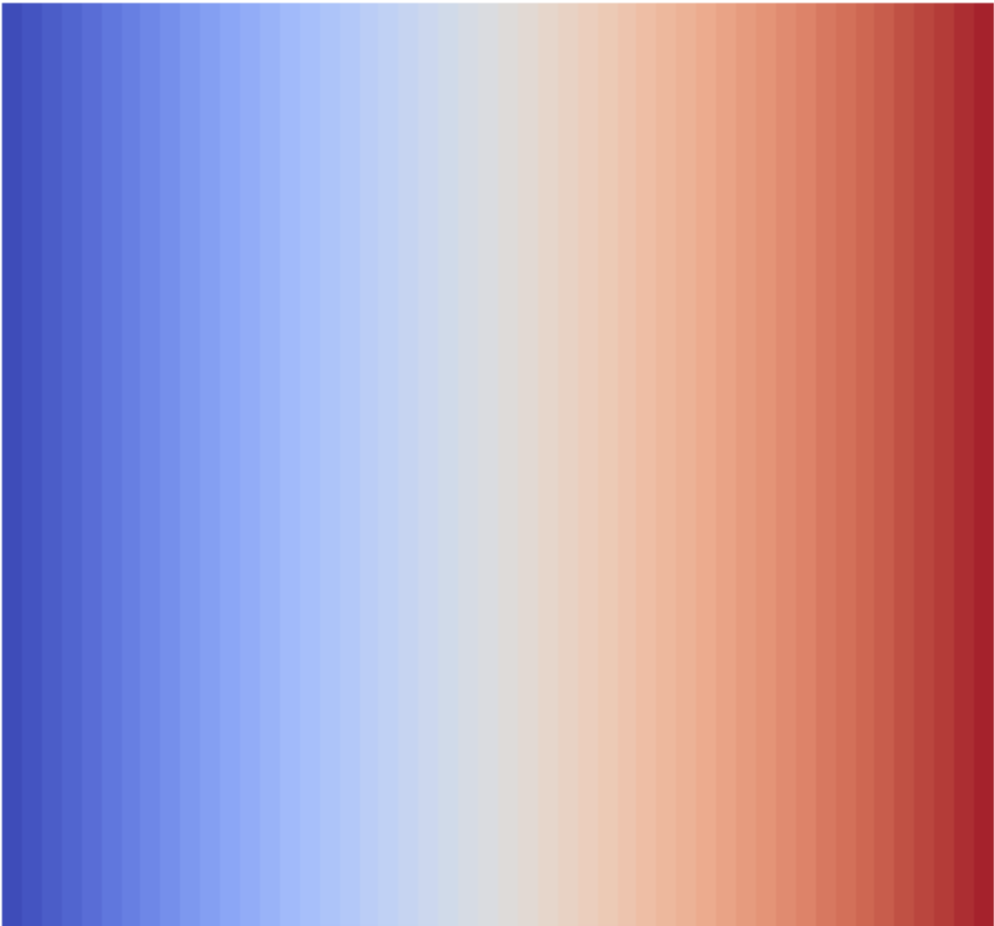,
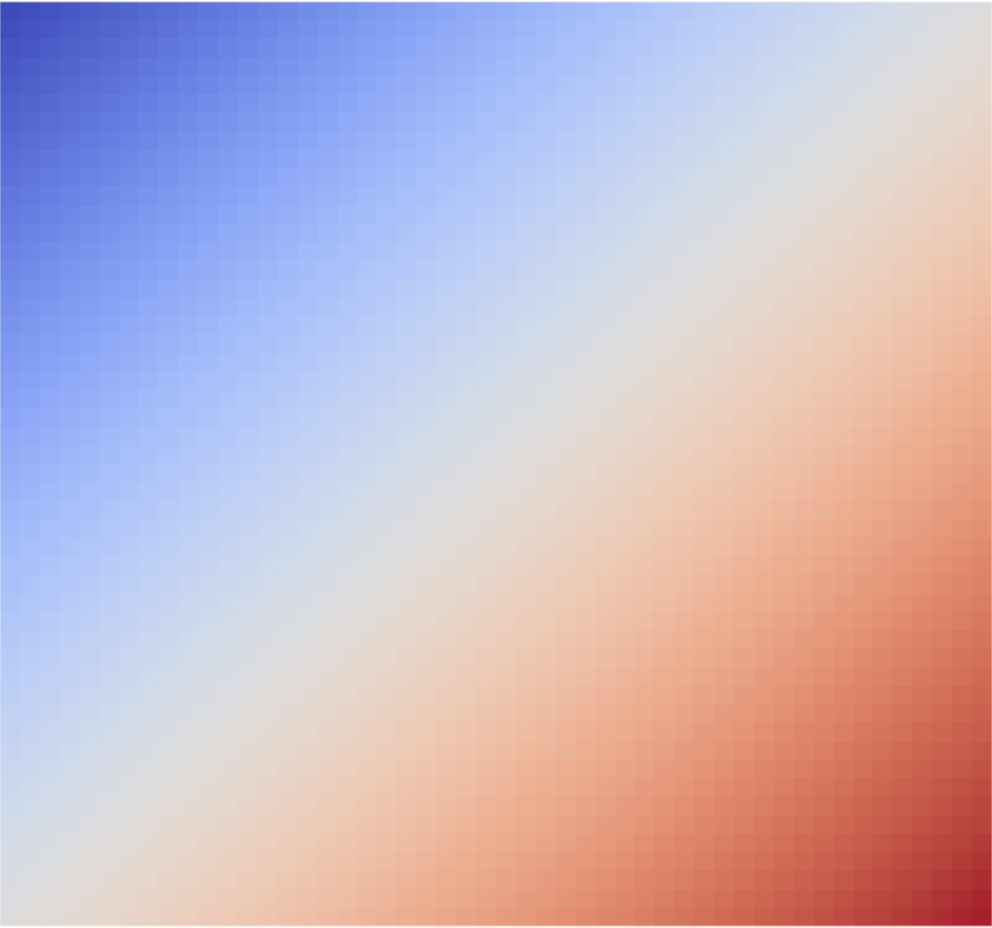,

# Homework:

1)Given the dataframe attached "df3.csv", which columns contributed to creating the column "f"?

2)Plot the function y = 1/x between -10 and 10 

3)Recreate the following heatmaps:

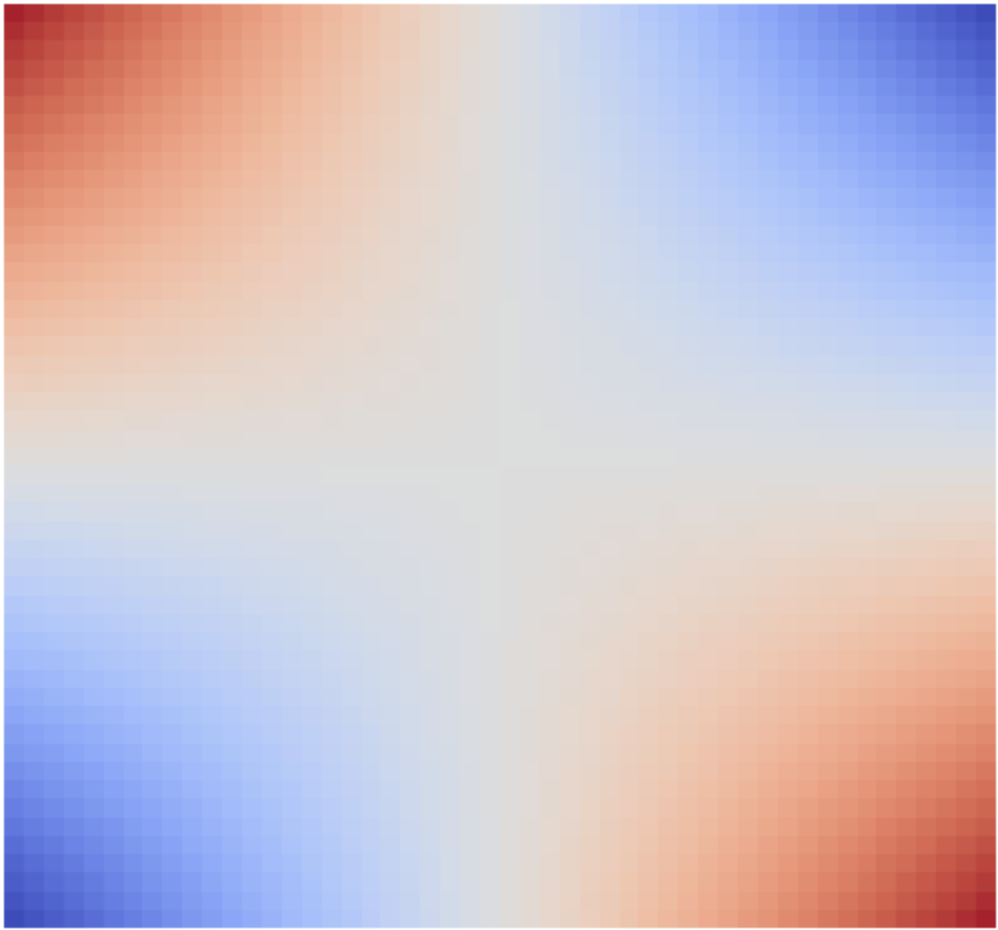,
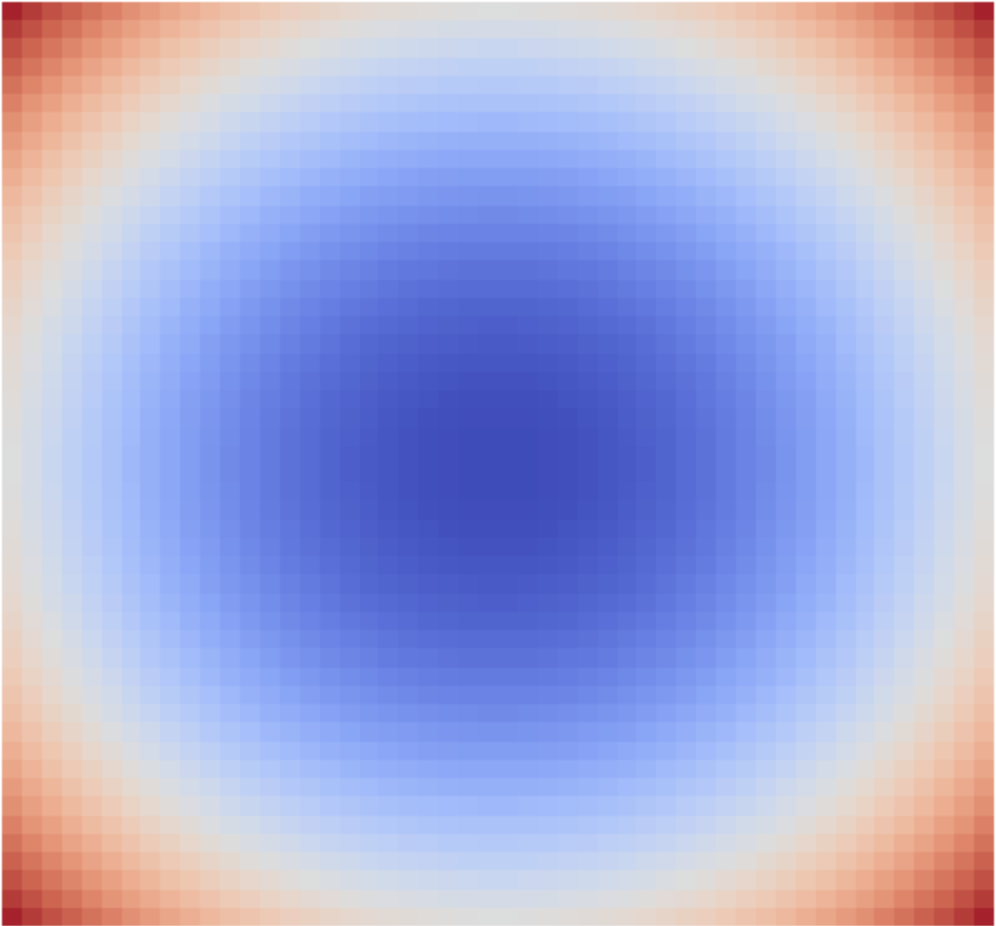,
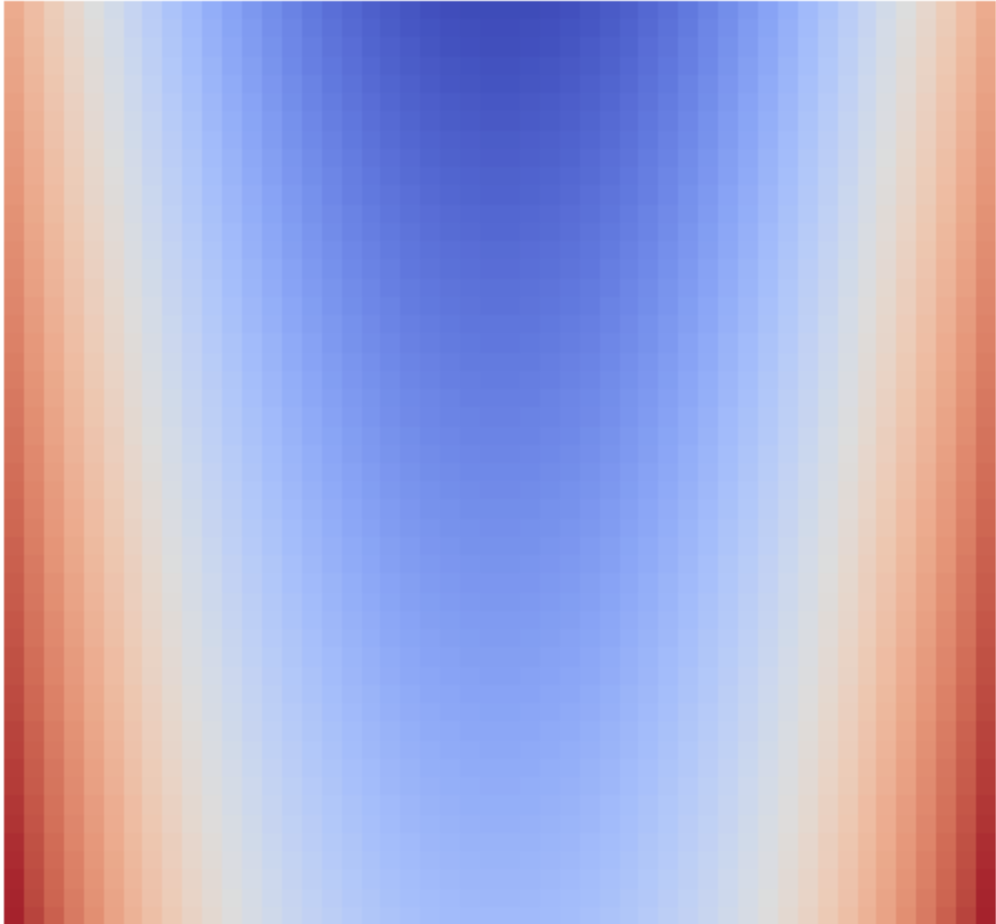

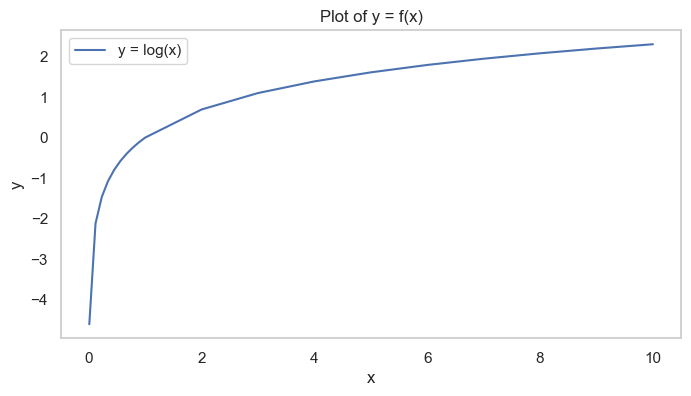

In [42]:
# Generate x values
x = np.append(np.linspace(0.01, 1, 10), np.linspace(1, 10, 10))
# Define a function y = f(x)
#y = np.sin(x) * np.exp(-0.1 * x**2)
y = np.log(x)
# Plot y = f(x)
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='y = log(x)', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = f(x)')
plt.legend()
plt.grid()
plt.show()

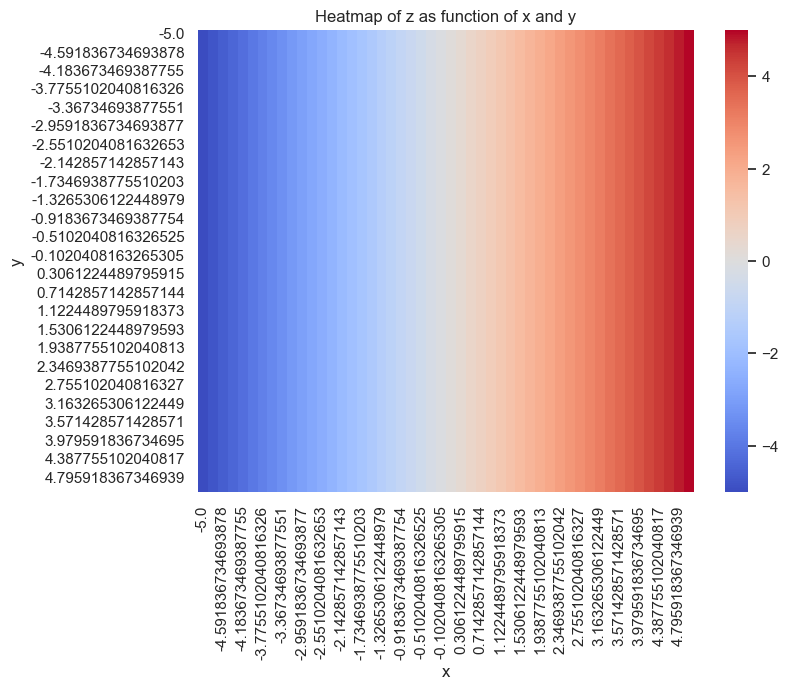

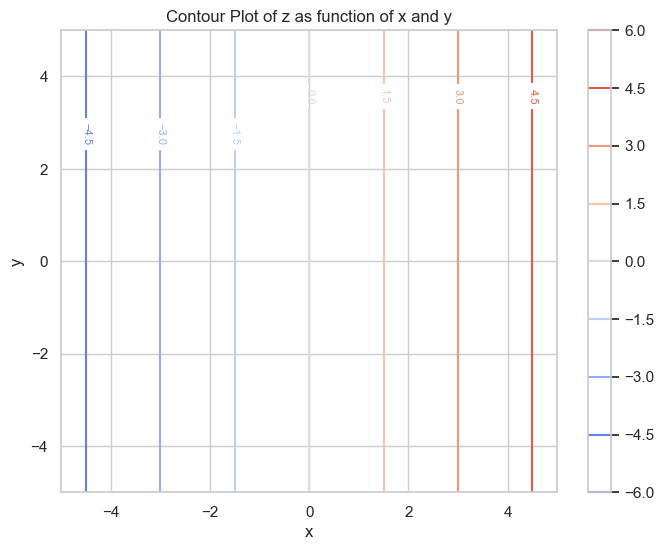

In [48]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X # Example function


# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

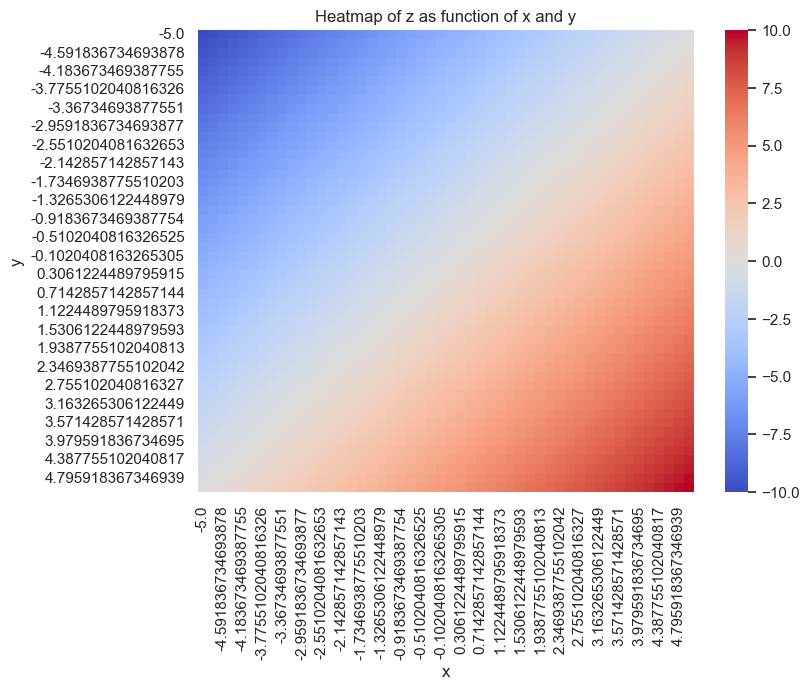

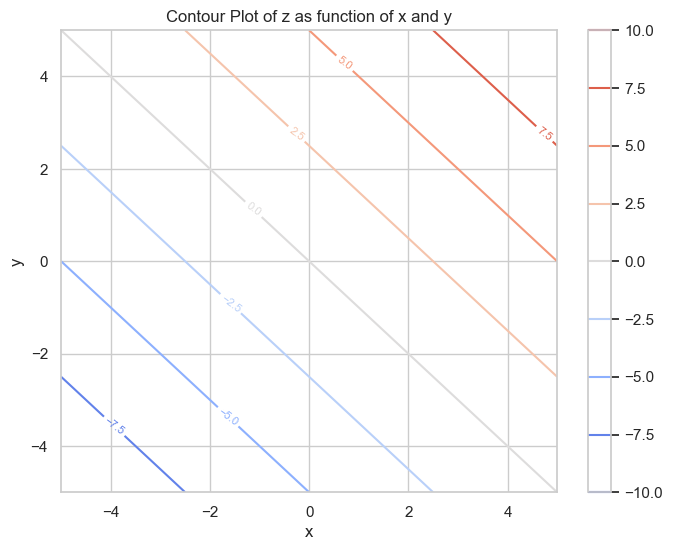

In [46]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X + Y # Example function



# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()